## Приоритизация гипотез.

### Загрузка и анализ датасета

In [1]:
import pandas as pd
import datetime as dt
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings

In [2]:
df=pd.read_csv('/datasets/hypothesis.csv') #загружаю датасет

In [3]:
df.isna().sum() #пропусков нет

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64

In [4]:
df.duplicated().sum() #дубликатов нет

0

In [5]:
df.info() #смотрю информацию о датафрейме
df.columns = df.columns.str.lower() #меняю названия к нижнему регистру

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


### Приоритизация гипотез

In [6]:
df['ice']=round((df['impact']*df['confidence'])/df['efforts'])
print(df[['hypothesis', 'ice']].sort_values(by='ice', ascending=False))
pd.set_option('display.max_colwidth', None)
print()
print('При применении фреймворка ICE – наиболее перспективная гипотеза:')
print('"Запустить акцию, дающую скидку на товар в день рождения"')

                                          hypothesis   ice
8  Запустить акцию, дающую скидку на товар в день...  16.0
0  Добавить два новых канала привлечения трафика,...  13.0
7  Добавить форму подписки на все основные страни...  11.0
6  Показать на главной странице баннеры с актуаль...   8.0
2  Добавить блоки рекомендаций товаров на сайт ин...   7.0
1  Запустить собственную службу доставки, что сок...   2.0
3  Изменить структура категорий, что увеличит кон...   1.0
4  Изменить цвет фона главной страницы, чтобы уве...   1.0
5  Добавить страницу отзывов клиентов о магазине,...   1.0

При применении фреймворка ICE – наиболее перспективная гипотеза:
"Запустить акцию, дающую скидку на товар в день рождения"


In [7]:
df['rice']=round((df['reach']*df['impact']*df['confidence'])/df['efforts'])
print(df[['hypothesis', 'rice']].sort_values(by='rice', ascending=False))
print()
print(f'При применении фреймворка RICE – наиболее перспективная гипотеза:')
print('"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"')
pd.set_option('display.max_colwidth', None)
print()
print('Фреймворк ICE не учитывает охват пользователей,')
print('из-за этого первичный анализ дал более высокий рейтинг гипотезе с низкой базой охвата')

                                                                                                     hypothesis  \
7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
8                                                       Запустить акцию, дающую скидку на товар в день рождения   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
5                      Добавить страницу отзывов клиентов о магазине, что позвол

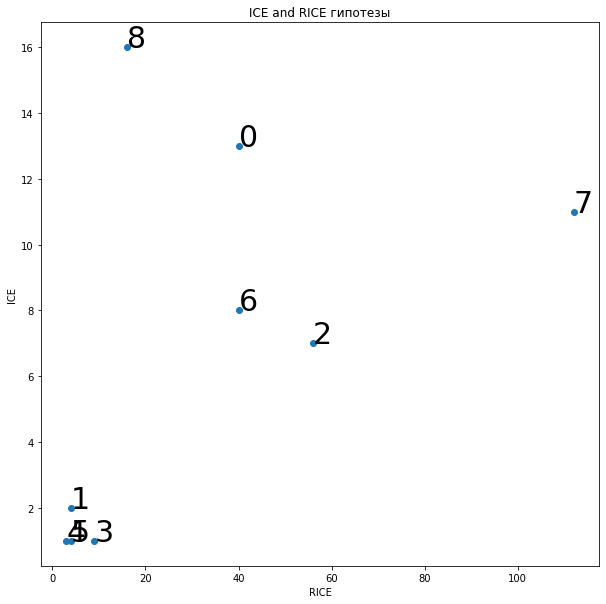

In [8]:
#Строю точечный график приоритизации гипотез
y = df['ice'] 
z = df['rice'] 
n = df.index 

fig, ax = plt.subplots()
ax.scatter(z, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i], y[i]), size=30)

plt.title("ICE and RICE гипотезы") 
plt.xlabel("RICE") 
plt.ylabel("ICE")

fig.set_figheight(10)
fig.set_figwidth(10) 
plt.show()   

## Анализ A/B-теста

### Загрузка и анализ датасета

In [9]:
orders=pd.read_csv('/datasets/orders.csv')
visitors=pd.read_csv('/datasets/visitors.csv')

In [10]:
orders.isna().sum() #пропусков нет
visitors.isna().sum() #пропусков нет

date        0
group       0
visitors    0
dtype: int64

In [11]:
orders.duplicated().sum() #дубликатов нет
visitors.duplicated().sum() #дубликатов нет

0

In [13]:
orders.info() #необходимо изменить формат столбца data
visitors.info() #необходимо изменить формат столбца data
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [14]:
print(orders.groupby('group').agg({'group': 'count'}))
print(visitors.groupby('group').agg({'group': 'count'}))
print('В тесте принимает участие две группы А и В')
print()
print('Дата начала теста:', orders['date'].min())
print('Дата окончания теста:', orders['date'].max())

       group
group       
A        557
B        640
       group
group       
A         31
B         31
В тесте принимает участие две группы А и В

Дата начала теста: 2019-08-01 00:00:00
Дата окончания теста: 2019-08-31 00:00:00


In [15]:
a = orders.loc[orders['group'] == "A"]
b = orders.loc[orders['group'] == "B"]
doubl = []

a1 = visitors.loc[orders['group'] == "A"]
b1 = visitors.loc[orders['group'] == "B"]
doubl1 = []

In [16]:
for i in a['visitorId']:
    if i in doubl:
        continue
    for j in b['visitorId']:
        if i == j:
            doubl.append(i)
            break

for i in a1['visitors']:
    if i in doubl:
        continue
    for j in b1['visitors']:
        if i == j:
            doubl1.append(i)
            break
 
print('Кол-во повторяющихся пользователей в обоих списках:', len(doubl1)+len(doubl))

Кол-во повторяющихся пользователей в обоих списках: 61


In [12]:
#код ревьюера. Лучше так записать проверку, чтобы видеть результаты по обоим датасетам
orders.duplicated().sum(), visitors.duplicated().sum() 

(0, 0)

### Построение графика кумулятивной выручки по группам

В середине теста сегмент В вырвался вперед и продолжил лидировать весь остаток теста.
Похоже, что аномально большие заказы все-таки влияют на результаты. При заключительном анализе их нужно удалить


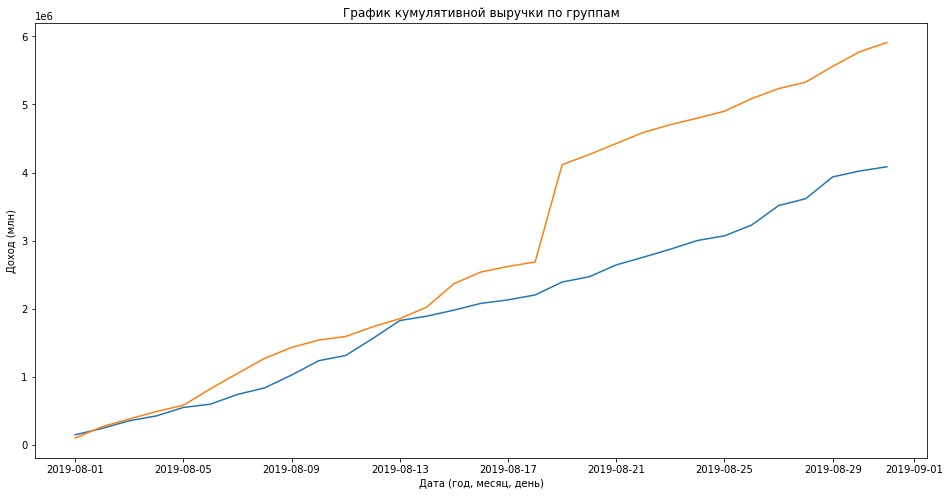

In [17]:
register_matplotlib_converters()

datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

plt.figure(figsize=(16, 8))
plt.title("График кумулятивной выручки по группам")

cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.xlabel("Дата (год, месяц, день)") 
plt.ylabel("Доход (млн)")

print('В середине теста сегмент В вырвался вперед и продолжил лидировать весь остаток теста.')
print('Похоже, что аномально большие заказы все-таки влияют на результаты. При заключительном анализе их нужно удалить')

In [18]:
print('Даты начала и окончания теста совпадают с оригинальным датафреймом.')
print(cumulativeData['date'].min())
print(cumulativeData['date'].max())

Даты начала и окончания теста совпадают с оригинальным датафреймом.
2019-08-01 00:00:00
2019-08-31 00:00:00


### Построение графика кумулятивного среднего чека по группам

Кумулятивное знаниче среднего чека по сегментам продолжает колебаться.
Скорее всего, принимать решение по этой метрике рано.
Или требуется дополнительный анализ выбросов, которые так сильно искажают результаты.


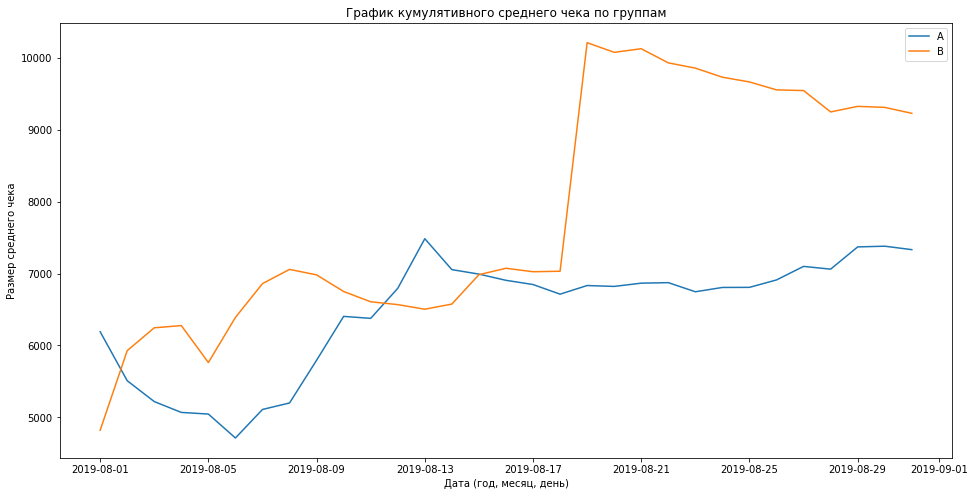

In [19]:
plt.figure(figsize=(16, 8))
plt.title("График кумулятивного среднего чека по группам")
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xlabel("Дата (год, месяц, день)") 
plt.ylabel("Размер среднего чека")
plt.legend()
print('Кумулятивное знаниче среднего чека по сегментам продолжает колебаться.')
print('Скорее всего, принимать решение по этой метрике рано.')
print('Или требуется дополнительный анализ выбросов, которые так сильно искажают результаты.')

### Построение графика относительного изменения кумулятивного среднего чека группы B к группе A

Результаты теста значительно и резко менялись в несколько дат.
Видимо, именно тогда были совершены аномальные заказы


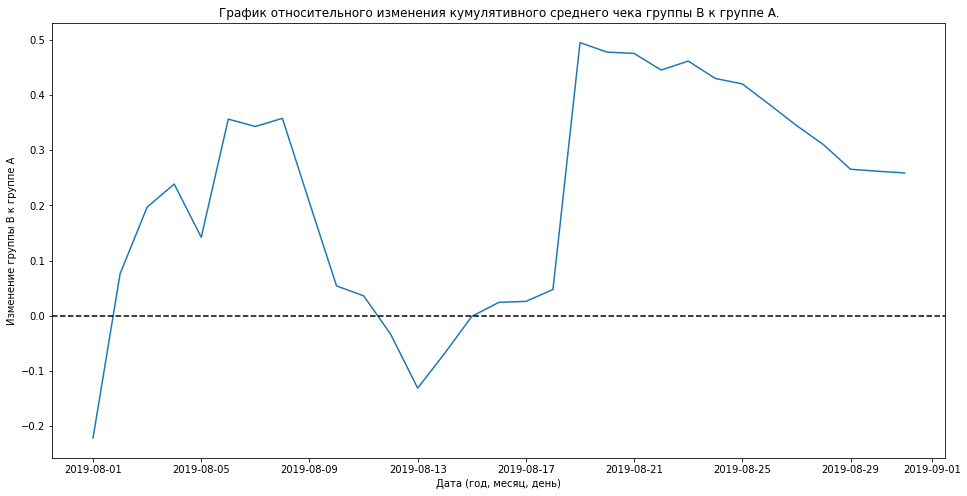

In [20]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(16, 8))
plt.title("График относительного изменения кумулятивного среднего чека группы B к группе A.")
          
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel("Дата (год, месяц, день)") 
plt.ylabel("Изменение группы B к группе A")

print('Результаты теста значительно и резко менялись в несколько дат.')
print('Видимо, именно тогда были совершены аномальные заказы')

### Построение графика кумулятивной конверсии по группам

В начале теста сегмент А имел большую конверсию, но постепенно сегмент В выровнялся и зафиксировался примерно около одного значения, больше значения сегмента А.


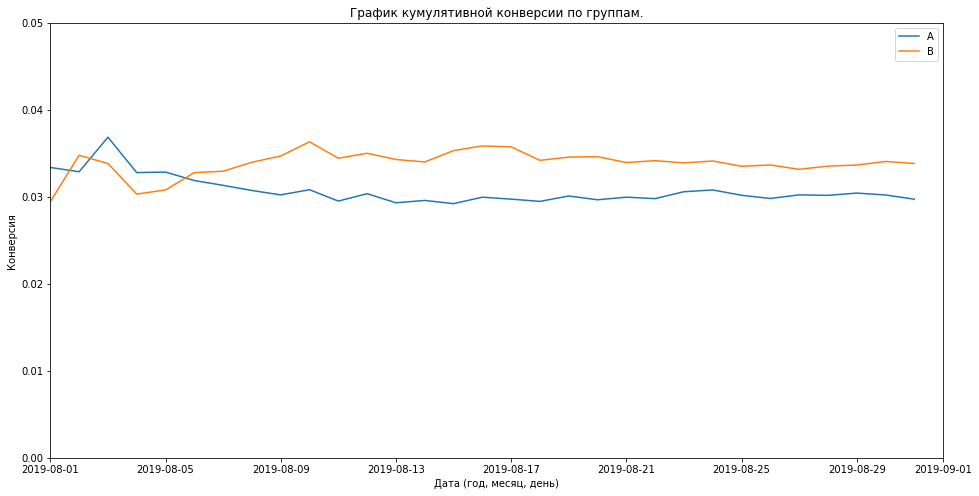

In [21]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(16, 8))
plt.title("График кумулятивной конверсии по группам.")

plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.xlabel("Дата (год, месяц, день)") 
plt.ylabel("Конверсия")
plt.legend()
# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0, 0.05])
print('В начале теста сегмент А имел большую конверсию, но постепенно сегмент В выровнялся и зафиксировался примерно около одного значения, больше значения сегмента А.')

### Построение графика относительного изменения кумулятивной конверсии группы B к группе A

Почти с самого начала теста группа В лидирует по конверсии: на протяжении всего теста показатель выше 10%, в середине теста достаигает пика в 20% относительно группы А


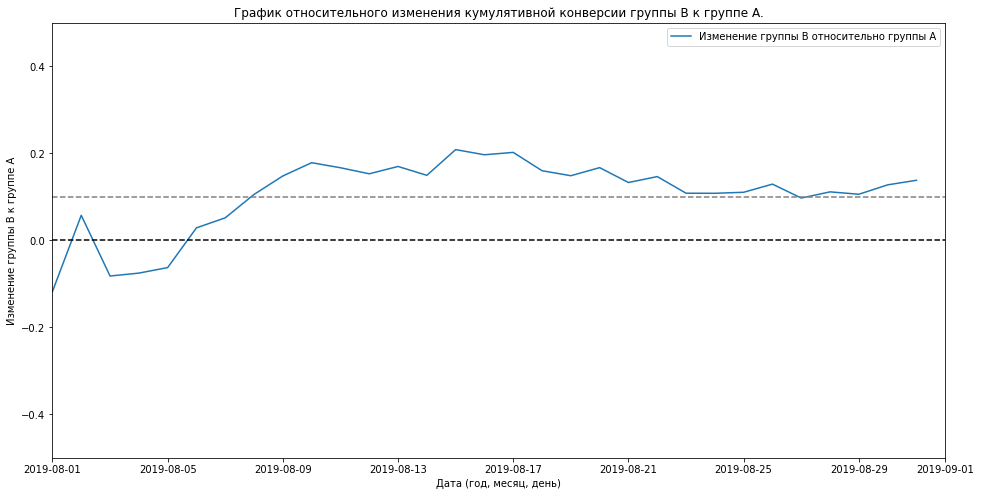

In [22]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(16, 8))
plt.title("График относительного изменения кумулятивной конверсии группы B к группе A.")

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Изменение группы B относительно группы A")
plt.xlabel("Дата (год, месяц, день)") 
plt.ylabel("Изменение группы B к группе A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-09-01', -0.5, 0.5])
print('Почти с самого начала теста группа В лидирует по конверсии: на протяжении всего теста показатель выше 10%, в середине теста достаигает пика в 20% относительно группы А')

### Построение точечного графика количества заказов по пользователям

Подавляющее число пользователей совершило 1 заказ
Скорее всего система повторных продаж развита слабо. Возможная точка роста.
Пользователей совершивших более 3х покупок можно считать аномальными.

        orders
orders        
1          937
2           64
3           17
4            3
5            6
8            1
9            1
11           2


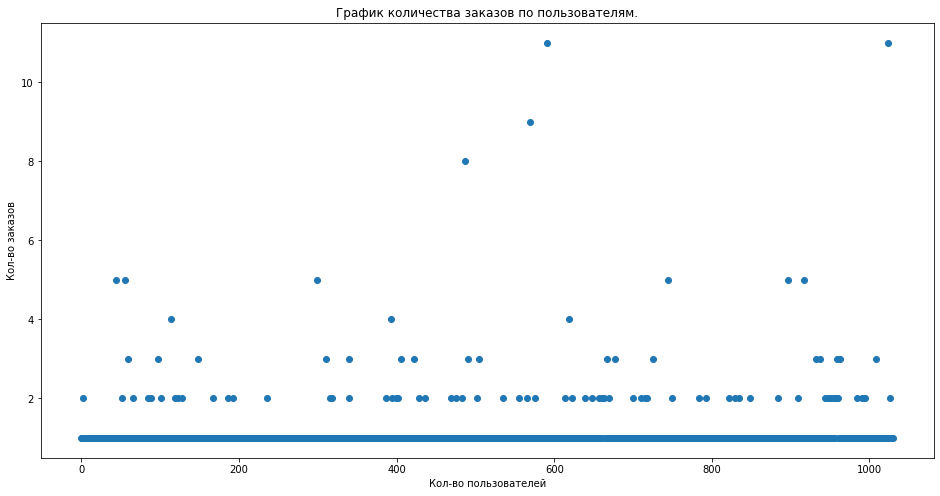

In [23]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['userId', 'orders']

x_values = pd.Series(range(0, len(ordersByUsers)))

plt.figure(figsize=(16, 8))
plt.title("График количества заказов по пользователям.")
plt.scatter(x_values, ordersByUsers['orders']) 
plt.xlabel("Кол-во пользователей") 
plt.ylabel("Кол-во заказов")

print('Подавляющее число пользователей совершило 1 заказ')
print('Скорее всего система повторных продаж развита слабо. Возможная точка роста.')
print('Пользователей совершивших более 3х покупок можно считать аномальными.')
print()
print(ordersByUsers.groupby('orders').agg({'orders': 'count'})) #проверяю соответсвие цифр графику

### Вычисление 95-й и 99-й перцентилей количества заказов на пользователя

In [24]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))  
print()
print('Не более 5% пользователей совершали больше 2х заказов.')
print('И не более 1% пользователей больше 4х заказов.')
print('Пользователей совершивших заказ более 3х раз можно считать аномальными')

[2. 4.]

Не более 5% пользователей совершали больше 2х заказов.
И не более 1% пользователей больше 4х заказов.
Пользователей совершивших заказ более 3х раз можно считать аномальными


### Построение точечного графика стоимостей заказов

Медианное значние стоимости заказов около 2978.0. Есть выброс в районе 1.2 млн и 200 тыс
В целом, выбросов немного


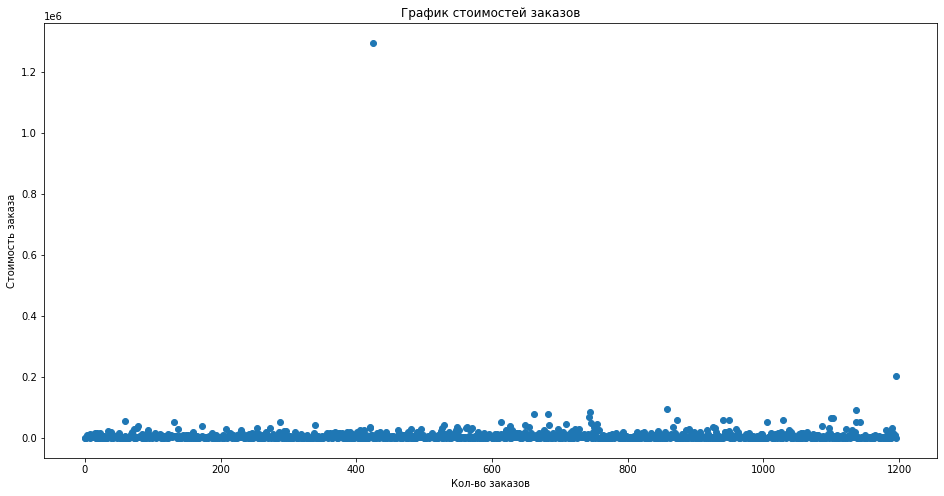

In [25]:
plt.figure(figsize=(16, 8))
plt.title("График стоимостей заказов")
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.xlabel("Кол-во заказов") 
plt.ylabel("Стоимость заказа")
medrev=orders['revenue'].median()
print(f'Медианное значние стоимости заказов около {medrev}. Есть выброс в районе 1.2 млн и 200 тыс')
print('В целом, выбросов немного')

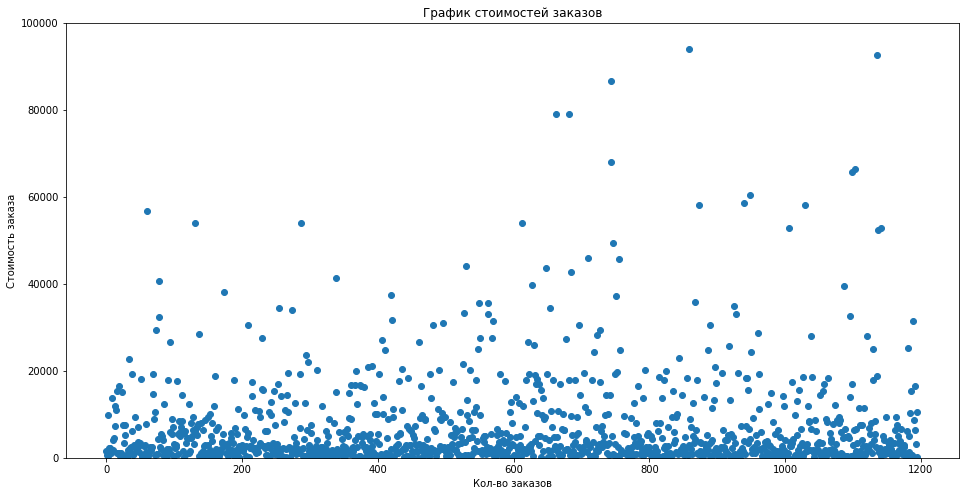

In [26]:
plt.figure(figsize=(16, 8))
plt.title("График стоимостей заказов")
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.xlabel("Кол-во заказов") 
plt.ylabel("Стоимость заказа")
plt.ylim((0,100000))
medrev=orders['revenue'].median()

### Вычисление 95-й и 99-й перцентилей стоимости заказов

In [27]:
print(np.percentile(orders['revenue'], [95, 99]))
print()
print('Не более 5% стоимости заказов составило более 28тыс.')
print('И не более 1% стоимости заказов составило более 58тыс.')
print('Заказы перешедшие границу стоимости 28тыс можно считать аномальными')

[28000.  58233.2]

Не более 5% стоимости заказов составило более 28тыс.
И не более 1% стоимости заказов составило более 58тыс.
Заказы перешедшие границу стоимости 28тыс можно считать аномальными


### Расчет статистической значимости различий в конверсии между группами по «сырым» данным

In [28]:
#подготавливаю данные для дальнейшего анализа
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5))
print(data.info())

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              24           148579              21   
1 2019-08-02              20            93822              24   
2 2019-08-03              24           112473              16   
3 2019-08-04              16            70825              17   
4 2019-08-05              25           124218              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0           101217                  24               148579   
1           165531                  44               242401   
2           114248                  68               354874   
3           108571                  84               425699   
4            92428                 109               549917   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  21               101217               719   
1                  45               266748               619   
2                  61               38

In [29]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId' : pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId' : pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('Гипотеза: В конверсии между группами по «сырым» данным нет статистически значимых различий')
print('Альтернативная гипотеза: В конверсии между группами по «сырым» данным есть статистически значимые различия')
print()
print('p-value: {0:.5f}'.format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print('p-value меньше 0.05, поэтому нулевую гипотезу отвергаем. Статистически значимые различия в группах есть')
print()
print('Прирост средней конверсии группы В относительно группы А: {0:.3f}'.format(sampleB.mean() / sampleA.mean() - 1))


Гипотеза: В конверсии между группами по «сырым» данным нет статистически значимых различий
Альтернативная гипотеза: В конверсии между группами по «сырым» данным есть статистически значимые различия

p-value: 0.01679
p-value меньше 0.05, поэтому нулевую гипотезу отвергаем. Статистически значимые различия в группах есть

Прирост средней конверсии группы В относительно группы А: 0.138


### Вычисление статистической значимости различий в среднем чеке заказа между группами по «сырым» данным

In [30]:
print('Гипотеза: В среднем чеке заказа между группами по «сырым» данным нет статистически значимых различий')
print('Альтернативная гипотеза: В среднем чеке заказа между группами по «сырым» данным есть статистически значимые различия')
print()
print('p-value: {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Значение p-value больше 0.05, соответственно статистически значимых отличий в среднем чеке между группами нет.')
print()
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 
print('Относительное различие среднего чека между сегментами 25,9%. Хотя разница более 25%, тем не менее она не является статистически значимой')

Гипотеза: В среднем чеке заказа между группами по «сырым» данным нет статистически значимых различий
Альтернативная гипотеза: В среднем чеке заказа между группами по «сырым» данным есть статистически значимые различия

p-value: 0.729
Значение p-value больше 0.05, соответственно статистически значимых отличий в среднем чеке между группами нет.

0.259
Относительное различие среднего чека между сегментами 25,9%. Хотя разница более 25%, тем не менее она не является статистически значимой


### Вычисление статистической значимости различий в конверсии между группами по «очищенным» данным

In [31]:
#очищаю данные, нахожу аномлаьных пользователей
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsers['orders'], [95, 99])[0]]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(ordersByUsers['orders'], [95, 99])[0]]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], [95, 99])[0]]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5)) #проверяю результат

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
dtype: int64


In [32]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 
print('Гипотеза: В конверсии между группами по «очищенным» данным нет статистически значимых различий')
print('Альтернативная гипотеза: В конверсии между группами по «очищенным» данным есть статистически значимые различия')
print()
print('p-value: {0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('После очищения данных от аномалий, статистическая значимость остается достигнутой.')
print()
print('Относительное различие: {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))
print('Показатели сегмента В лучше сегмента А на 14,8%')

Гипотеза: В конверсии между группами по «очищенным» данным нет статистически значимых различий
Альтернативная гипотеза: В конверсии между группами по «очищенным» данным есть статистически значимые различия

p-value: 0.01304
После очищения данных от аномалий, статистическая значимость остается достигнутой.

Относительное различие: 0.173
Показатели сегмента В лучше сегмента А на 14,8%


### Вычисление статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным

In [33]:
print('Гипотеза: В среднем чеке заказа между группами по «очищенным» данным нет статистически значимых различий')
print('Альтернативная гипотеза: В среднем чеке заказа между группами по «очищенным» данным есть статистически значимые различия')
print()
print(
    'p-value: {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "Относительное различие: {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)
print()
print('P-value увеличился, но и разница между сегментами сократилась с 25,6% до 1,7%.')
print('Удаление аномалий повлияло на результат')

Гипотеза: В среднем чеке заказа между группами по «очищенным» данным нет статистически значимых различий
Альтернативная гипотеза: В среднем чеке заказа между группами по «очищенным» данным есть статистически значимые различия

p-value: 0.738
Относительное различие: -0.020

P-value увеличился, но и разница между сегментами сократилась с 25,6% до 1,7%.
Удаление аномалий повлияло на результат


<b>Результаты анализа</b>:

<b>Графики</b>:

- График кумулятивной выручки показывает, что выручка группы В стабильно выше группы А.
- График кумулятивного среднего чека по группам сильно колеблется, это обусловленно аномалиями. По графику вывод делать нельзя.
- График относительного изменения среднего чека сильно колеблется, это обусловленно аномалиями. По графику вывод делать нельзя.
- График кумулятивное конверсии говорит о том, что результаты группы B стабильно лучше группы А практически на протяжении всего теста.
- График различия конверсии между группами сообщает, что результаты группы B лучше группы A. Отрицательная тенденция не наблюдается;
- График количества заказов по пользователям показывает, что подавляющее большинство покупателей совершили только 1 покупку.

<b>Средний чек</b>:

- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
- Относительное различие между группами по среднему чеку после очищения данных сошло на "нет". C 25,9% на 1,7%;

<b>Конверсия</b>
- Статистически значимое различие по конверсии между группами достигается и по "сырым" и по "очищенным" данным.
- Относительное различие ежду группами по конверсии после очищения данных сохранилось и составило 14,8%

##### Общий вывод:
Тест проводился на протяжении одного месяца. Проводить тест далее не вижу необходимости. 
Основное отличие  между группами, это увеличенная на 14,8% конверсия в группе B. Средний чек остался на прежнем уровне.
Считаю необходимым остановить тест и зафиксировать победу группы В.
p.s. Повторные продажи, это потенциальная точка роста. Подавляющее большинство клиентов совершали покупку только 1 раз.